<a href="https://colab.research.google.com/github/Nefarian1/STQD6014-data-science/blob/main/%E9%A2%91%E8%B0%B1%E6%8A%98%E7%BA%BF%E5%93%88%E5%90%89%E7%B1%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#皇家哈吉米哥本哈根最终幻想

Sampling Time [s]: 2.00E-05 [s]
Sampling Frequency [kHz]: 50.0
Nyquist Frequency [kHz]: 25.0
Frequency Resolution [Hz]: 200.0


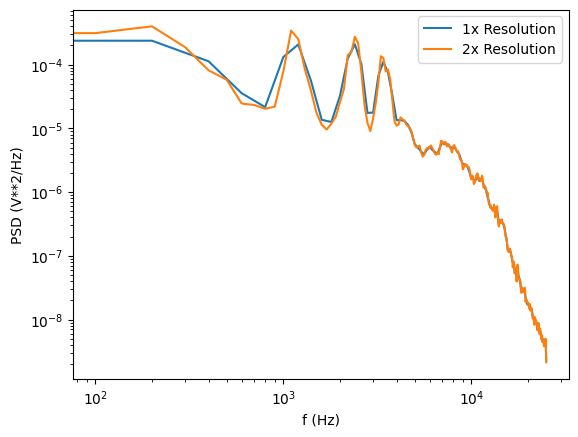

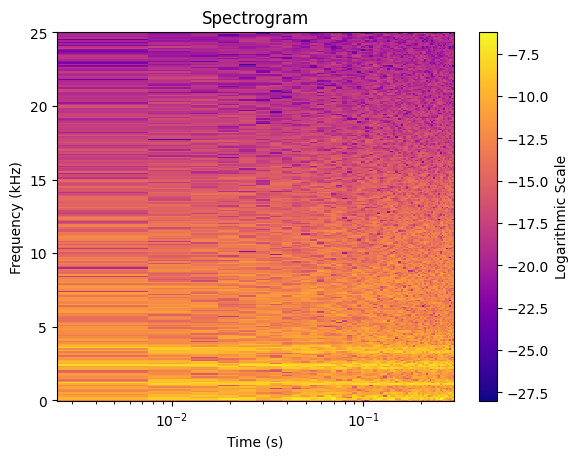

In [5]:
import numpy as np
import statsmodels.api as sm
import scipy.signal as dsp
import scipy.stats as sta
import matplotlib.pylab as plt

file = "/content/1.txt"#这里就是sample.dat了
exp = np.loadtxt(file, comments='#', delimiter=',')
time = exp[:,0]
sig = exp[:,1]

dt = (time[100] - time[0])/100
fs = 1.0/dt
nfft = 250
fnyq = fs/2
df = fs/nfft
print("Sampling Time [s]: {:.2E} [s]".format(dt))
print("Sampling Frequency [kHz]: {:.1f}".format(fs/1000))
print("Nyquist Frequency [kHz]: {:.1f}".format(fnyq/1000))
print("Frequency Resolution [Hz]: {:.1f}".format(df))


f_1x, psd_1x = dsp.welch(sig, fs=fs, nperseg=nfft*2, return_onesided=True, scaling='density')


f_2x, psd_2x = dsp.welch(sig, fs=fs, nperseg=nfft, return_onesided=True, scaling='density')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(f_2x, psd_2x, label='1x Resolution')
ax.plot(f_1x, psd_1x, label='2x Resolution')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("PSD (V**2/Hz)")
ax.set_xlabel("f (Hz)")
ax.legend()

#（Spectrogram）
f, t, Sxx = dsp.spectrogram(sig, fs=fs, nperseg=nfft*2, noverlap=nfft, scaling='density')

fig, ax = plt.subplots()
image = ax.pcolormesh(t, f / 1000, np.log(Sxx), shading='nearest', cmap='plasma')
cb = plt.colorbar(image)
ax.set_xscale('log')
cb.set_label('Logarithmic Scale')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (kHz)')
ax.set_title('Spectrogram')

plt.show()
